# Clustrring 
---
---

#### Imports

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

import plotly.express as px
import plotly

import plotly.graph_objects as go
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import silhouette_score

In [4]:
# Load data
df = pd.read_csv('/Users/patrick/Desktop/Lighthouse_labs/Data Projects/Clustering-/Customers/customers_log.csv', index_col=0)

In [5]:
df.head()

,income,age,years_with_bank,nbr_children,marital_status_1,marital_status_2,marital_status_3,marital_status_4
0,0.154185,0.184312,0.408539,0.258591,0,1,0,0
1,-0.726524,1.493070,-1.087435,-0.648298,0,1,0,0
2,-0.188366,-0.234490,1.530520,-0.648298,1,0,0,0
3,1.123798,0.603115,-0.339448,-0.648298,1,0,0,0
4,0.983479,0.864867,1.904514,1.165479,0,0,0,1


#### Clustering

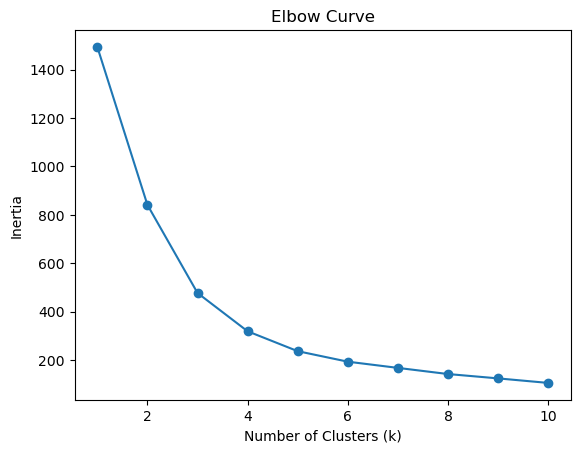

In [6]:
# # Test for number of clusters using the elbow method
X = df[['age','income']]

inertia = []
k_values = range(1, 11)  # Testing k from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

In [7]:
#Test for number of clusters using the shilouette method
silhouettes = []
K = range(2,10) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    label=kmeanModel.predict(X)
    silhouettes.append(silhouette_score(X,label))

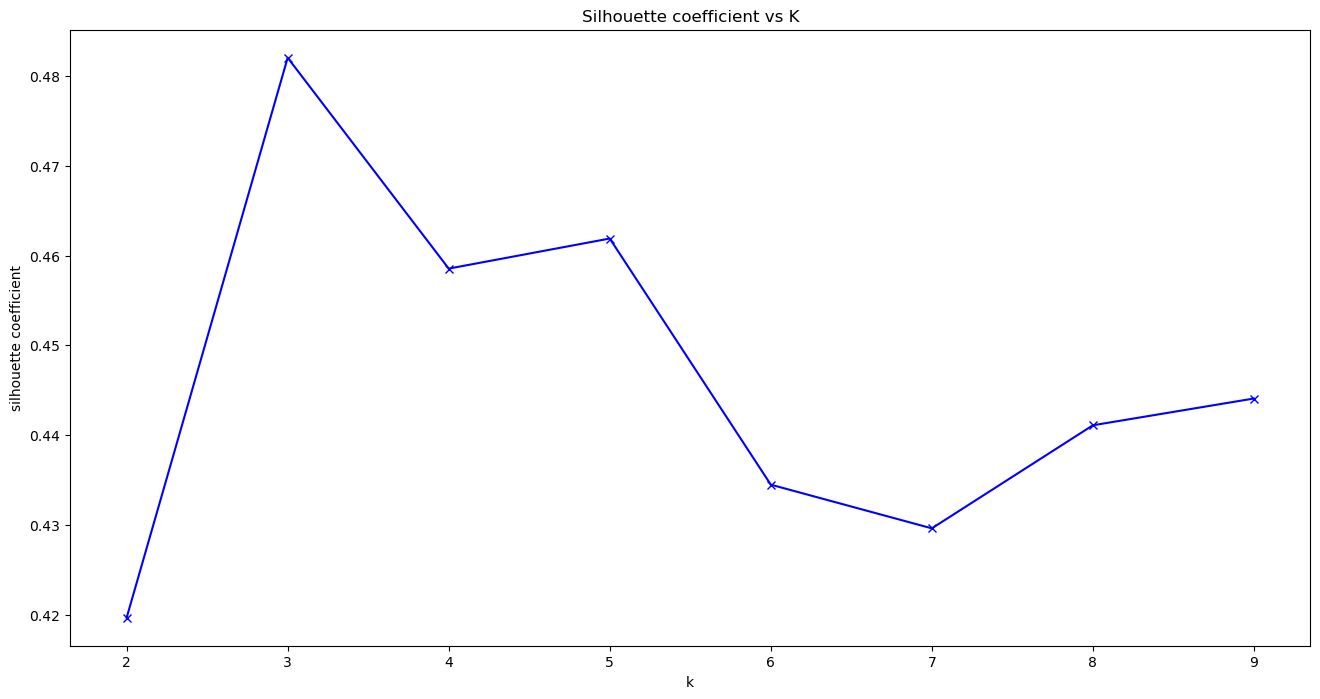

In [20]:
# plot the silhouettes
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.title('Silhouette coefficient vs K')
plt.show()

In [90]:
# plot cluster function 
def plot_clusters(X, y_res, plt_cluster_centers=False):
    # create scatter plot for samples from each cluster
    X_centroids = []
    for cluster in set(y_res):
        indices = np.where(y_res == cluster)[0]
        x = X.iloc[indices, 0]
        y = X.iloc[indices, 1]
        X_centroids.append(np.mean(x))
        plt.scatter(x, y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
                    
    
    # plot cluster centers (centroids)
    if plt_cluster_centers:
        centroids_x = X_centroids
        centroids_y = [np.mean(X.iloc[np.where(y_res == cluster)[0], 1]) for cluster in set(y_res)]
        plt.scatter(centroids_x, centroids_y, marker='*', color='red', label='Centroids', s=100)
    

    plt.legend()
    #plt.label()
    plt.grid()
    plt.show()

In [76]:
# import kmeans from sklearn
from sklearn.cluster import KMeans

In [77]:
# Fit the model

km = KMeans(n_clusters=3, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

# fit and predict
y_km = km.fit_predict(X)

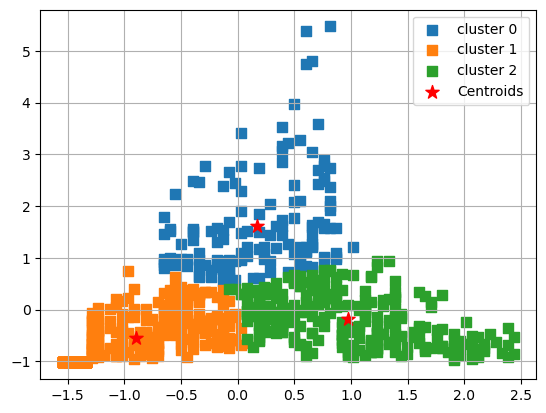

In [91]:
plot_clusters(X, y_km, plt_cluster_centers= True)

#### Radar charts

In [12]:
#Radar plot

#Plot features (columns) as theta (angle). Use the data grouped by the clusters
angle = df.columns

# 3: Initialize plot/figure
chart = go.Figure()

# Loop over each cluster 
for i in range(3):
    # Select column values in df_scaled
    radius = df.loc[i].values

# Plot values
    chart .add_trace(go.Scatterpolar
        (r = radius,
        theta = angle,
        fill = "toself",
        name = f'Cluster {i}'
            )
        )
# Add labels etc
chart.update_layout(
    polar=dict (  radialaxis = dict (visible = True)  ),
    showlegend=True
        )

chart.show()


In [13]:
# plot radar plot for each cluster
def plot_radar(df, cluster):
    # Plot features (columns) as theta (angle). Use the data grouped by the clusters
    
    angle = df.columns

    # Initialize plot/figure
    chart = go.Figure()

    # Select column values in df_scaled
    radius = df.loc[cluster].values

    # Plot values
    chart.add_trace(go.Scatterpolar
        (r = radius,
        theta = angle,
        fill = "toself",
        name = f'Cluster {cluster}'
            )
        )

    # Add labels etc
    chart.update_layout(
        polar=dict (  radialaxis = dict (visible = True)  ),
        showlegend=True
        )

    chart.show()

In [24]:
# plot radar plot for each cluster
plot_radar(df, 0)

### Principal Component Analysis (PCA)

In [44]:
# Reduce dimensionality with PCA to 4 components and plot the clusters in seaborn
pca = PCA(n_components=None)
dfx_pca = pca.fit(df)

# Visualize PCA components


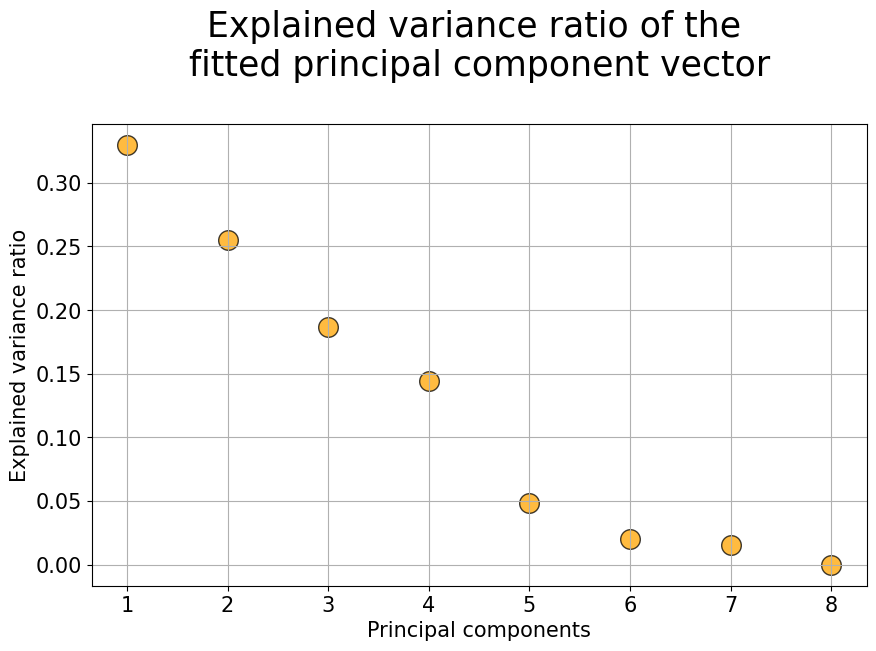

In [46]:
# plot explianed variance ratio
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()


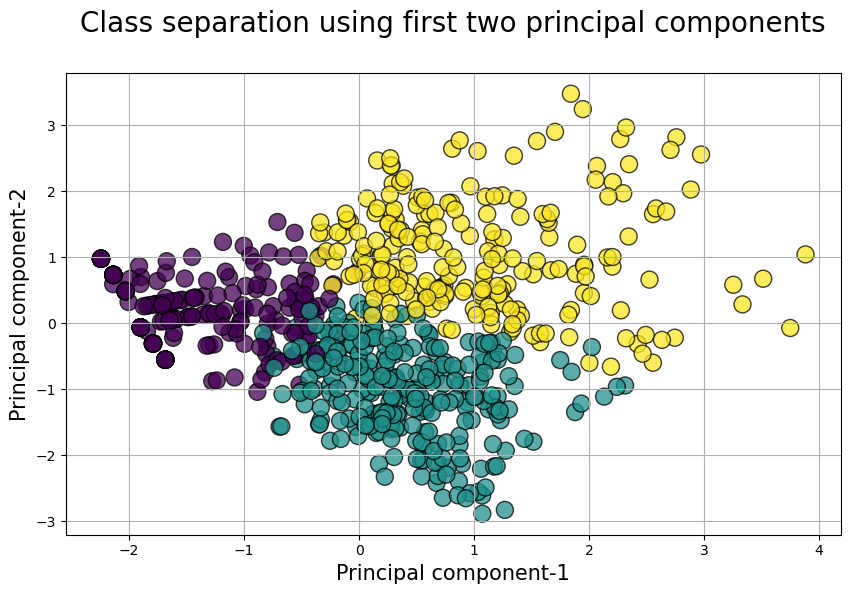

In [48]:
# print explained variance ratio
pca.explained_variance_ratio_

array([3.29901854e-01, 2.55194294e-01, 1.86738471e-01, 1.44523374e-01,
       4.83207053e-02, 1.98503005e-02, 1.54710012e-02, 2.39385966e-33])

In [51]:
df.head()

,income,age,years_with_bank,nbr_children,marital_status_1,marital_status_2,marital_status_3,marital_status_4
0,0.154185,0.184312,0.408539,0.258591,0,1,0,0
1,-0.726524,1.493070,-1.087435,-0.648298,0,1,0,0
2,-0.188366,-0.234490,1.530520,-0.648298,1,0,0,0
3,1.123798,0.603115,-0.339448,-0.648298,1,0,0,0
4,0.983479,0.864867,1.904514,1.165479,0,0,0,1


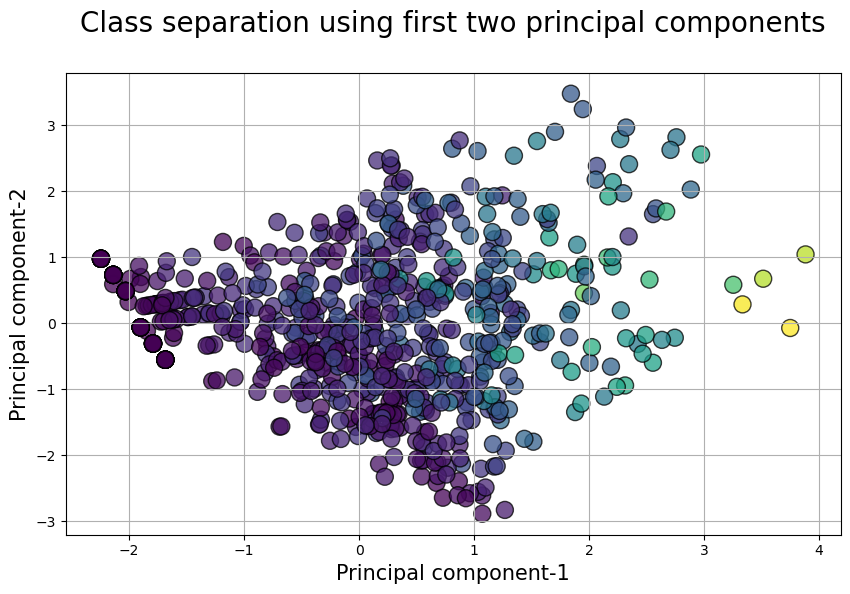

In [50]:
dfx_trans = pca.transform(df)
dfx_trans = pd.DataFrame(data=dfx_trans)

plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=df['income'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

In [64]:
pca = PCA(n_components=5)
dfx_pca = pca.fit(df)

In [65]:

km = KMeans(n_clusters=3, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

# fit and predict
y_km = km.fit_predict(X)

In [66]:
labels = km.fit_predict(pca.transform(df))

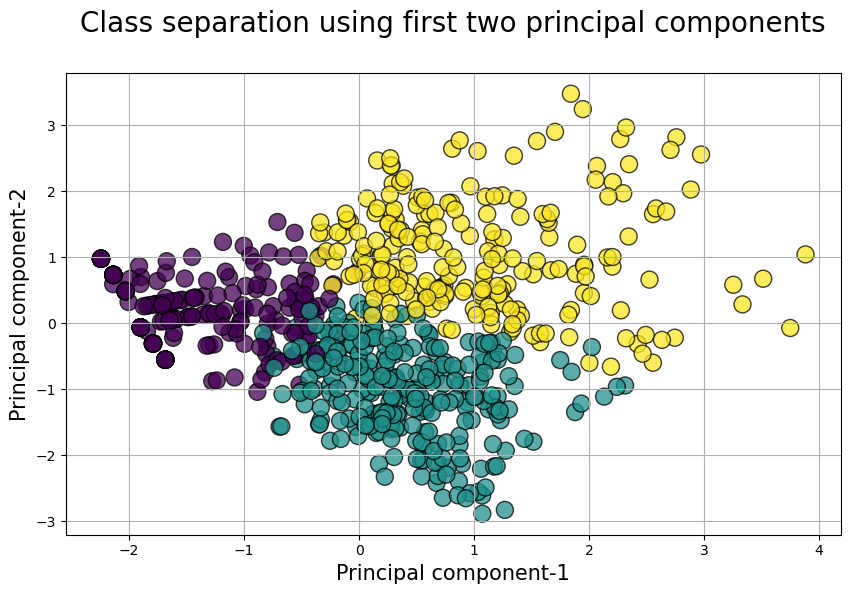

In [67]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=labels,edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

In [68]:
principal_components = pca.components_
principal_components_df = pd.DataFrame(data=principal_components, columns=df.columns)

In [71]:
pca.components_

array([[ 6.06540856e-01,  5.19581913e-01,  2.13729252e-01,
         4.40275948e-01, -2.77671393e-01,  2.07465552e-01,
         3.26600399e-02,  3.75458007e-02],
       [ 1.77588003e-01, -5.01351190e-01, -5.83815970e-01,
         6.09690684e-01, -4.19700444e-02, -2.34176012e-02,
         2.56928229e-02,  3.96948227e-02],
       [-1.10253839e-01, -4.67080261e-01,  7.78477776e-01,
         3.93833231e-01,  5.76236046e-02, -7.09595272e-02,
        -5.15386543e-04,  1.38513091e-02],
       [ 7.63269545e-01, -3.34351701e-01,  7.62700424e-02,
        -4.13815642e-01,  2.60658459e-01, -2.41675984e-01,
         2.24286383e-02, -4.14111136e-02],
       [-6.44972257e-02,  3.27803791e-01, -2.52362591e-02,
         2.25348058e-01,  2.89247887e-01, -7.83304908e-01,
         1.52983103e-01,  3.41073917e-01]])

In [69]:
principal_components_df.head()

,income,age,years_with_bank,nbr_children,marital_status_1,marital_status_2,marital_status_3,marital_status_4
0,0.606541,0.519582,0.213729,0.440276,-0.277671,0.207466,0.032660,0.037546
1,0.177588,-0.501351,-0.583816,0.609691,-0.041970,-0.023418,0.025693,0.039695
2,-0.110254,-0.467080,0.778478,0.393833,0.057624,-0.070960,-0.000515,0.013851
3,0.763270,-0.334352,0.076270,-0.413816,0.260658,-0.241676,0.022429,-0.041411
4,-0.064497,0.327804,-0.025236,0.225348,0.289248,-0.783305,0.152983,0.341074


In [73]:
import seaborn as sns

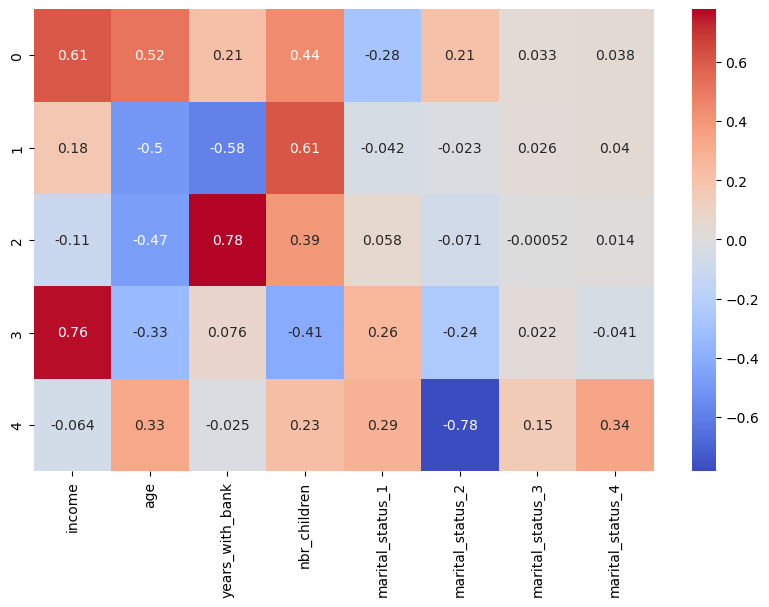

In [74]:
# plot correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(principal_components_df, cmap='coolwarm', annot=True)
plt.show()